## Customer Churn Prediction

### Import the libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression  
from sklearn.svm import SVC  
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix

### Load the dataset

In [2]:
# load the dataset
df = pd.read_csv(r'https://raw.githubusercontent.com/Venkatalakshmikottapalli/Customer-Churn-Prediction/refs/heads/main/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# print the head of the data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Summary

### Dataset Inspection

In [3]:
# shape of dataset
df.shape

(7043, 21)

In [4]:
# Columns of dataset
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
# Index
df.index

RangeIndex(start=0, stop=7043, step=1)

In [6]:
#sum of duplicates
df.duplicated().sum()
df

0

In [7]:
# information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Comment:
There are no nulls in the dataset

### Exploratory Data Analysis

In [8]:
# Get churn statistics
df['Churn'].describe()

count     7043
unique       2
top         No
freq      5174
Name: Churn, dtype: object

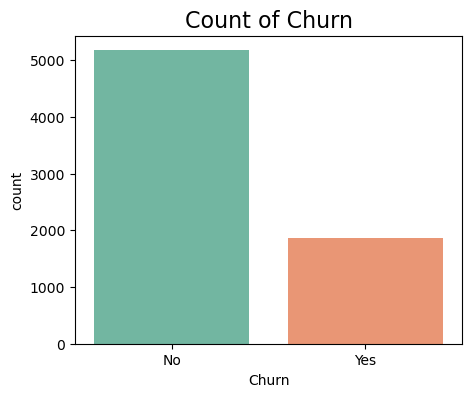

In [9]:
# Create the count plot 
plt.figure(figsize=(5, 4))
sns.countplot(x='Churn', data=df, hue='Churn', palette='Set2', legend=False)
plt.title('Count of Churn', fontsize=16)
plt.show()

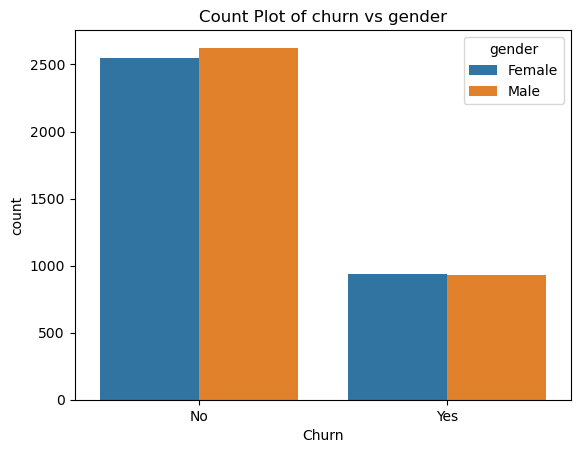

In [10]:
# Plot for churn vs gender
sns.countplot(x='Churn', hue='gender', data=df)
plt.title("Count Plot of churn vs gender")
plt.show()

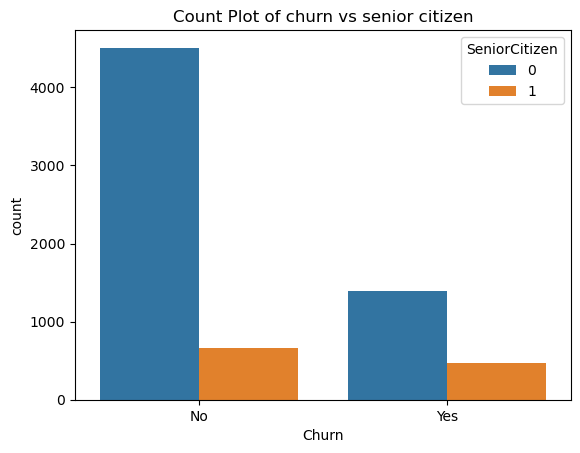

In [11]:
# Plot for churn vs senior citizen
sns.countplot(x='Churn', hue='SeniorCitizen', data=df)
plt.title("Count Plot of churn vs senior citizen")
plt.show()

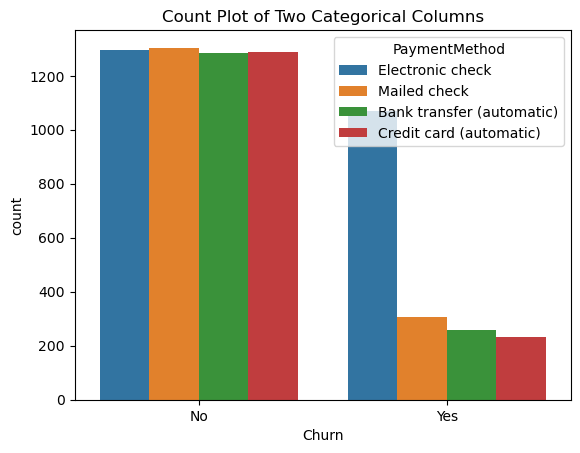

In [12]:
# Plot for churn vs Payment method
sns.countplot(x='Churn', hue='PaymentMethod', data=df)
plt.title("Count Plot of Two Categorical Columns")
plt.show()

## Data preprocessing 

In [13]:
# Strip whitespace and check if any value is an empty string
df['TotalCharges'] = df['TotalCharges'].str.strip()
blank_spaces = (df['TotalCharges'] == '').sum()
print(f"Number of blank spaces after stripping: {blank_spaces}")


Number of blank spaces after stripping: 11


In [14]:
# Replace blank spaces with NaN
df['TotalCharges'] = df['TotalCharges'].replace('', np.nan)

# Verify the replacement
print(f"Number of NaN values: {df['TotalCharges'].isna().sum()}")


Number of NaN values: 11


In [15]:
# Initialize the KNNImputer
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform')

# Use correlated numerical features for imputation
feature_for_imputation = ['TotalCharges']

# Apply KNN Imputation
df[feature_for_imputation] = knn_imputer.fit_transform(df[feature_for_imputation])

# Verify 
print(df['TotalCharges'].isnull().sum())  

0


In [16]:
# Convert 'TotalCharges' to a numeric type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Convert numerical features
numerical_features = ['MonthlyCharges', 'TotalCharges', 'tenure']
df[numerical_features] = df[numerical_features].astype(float)

# Convert ordinal features to category type
ordinal_features = ['Contract', 'PaymentMethod', 'InternetService']
df[ordinal_features] = df[ordinal_features].astype('category')

# Convert binary categorical features to category type
binary_categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
df[binary_categorical_features] = df[binary_categorical_features].astype('category')

# Convert multi-category features to category type
multi_category_features = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                           'StreamingTV', 'StreamingMovies', 'MultipleLines']
df[multi_category_features] = df[multi_category_features].astype('category')

# Verify the data types
print(df.dtypes)

customerID            object
gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure               float64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object


## Feature Engineering

In [17]:
# Create a new feature 'HasStreamingService'
df['HasStreamingService'] = ((df['StreamingTV'] == 'Yes') | (df['StreamingMovies'] == 'Yes')).astype(int)

In [18]:
# Drop customerID 
df = df.drop(columns = ['customerID'])

In [19]:
# Numerical features to be scaled
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Apply Standard Scaling to numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Categorical features to be encoded
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn',
                        'Contract', 'PaymentMethod', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines', 'HasStreamingService']

# Apply Label Encoding to categorical features
label_encoder = LabelEncoder()
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

# Verify the final DataFrame
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,HasStreamingService
0,0,0,1,0,-1.277445,0,1,0,0,2,...,0,0,0,0,1,2,-1.160323,-0.994971,0,0
1,1,0,0,0,0.066327,1,0,0,2,0,...,0,0,0,1,0,3,-0.259629,-0.173876,0,0
2,1,0,0,0,-1.236724,1,0,0,2,2,...,0,0,0,0,1,3,-0.362660,-0.960399,1,0
3,1,0,0,0,0.514251,0,1,0,2,0,...,2,0,0,1,0,0,-0.746535,-0.195400,0,0
4,0,0,0,0,-1.236724,1,0,1,0,0,...,0,0,0,0,1,2,0.197365,-0.941193,1,0


## Get feature importance

In [20]:
# Separate features and target
X_rf = df.drop(['Churn'], axis = 1)  
y_rf = df['Churn']

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_rf, y_rf)

# Get feature importances
importances = rf.feature_importances_
feature_names = X_rf.columns

# Create a DataFrame of feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display features importance
print("Top Important Features:")
print(feature_importance_df)

# Select the top 10 important features
top_features = feature_importance_df['Feature'].tolist()
X_top = X_rf[top_features]


Top Important Features:
                Feature  Importance
18         TotalCharges    0.191064
17       MonthlyCharges    0.174723
4                tenure    0.153676
14             Contract    0.076875
16        PaymentMethod    0.053376
11          TechSupport    0.045966
8        OnlineSecurity    0.039626
7       InternetService    0.031602
9          OnlineBackup    0.027841
0                gender    0.027634
15     PaperlessBilling    0.025730
10     DeviceProtection    0.022818
2               Partner    0.022732
6         MultipleLines    0.022469
1         SeniorCitizen    0.020118
3            Dependents    0.018674
12          StreamingTV    0.014913
13      StreamingMovies    0.014759
19  HasStreamingService    0.010321
5          PhoneService    0.005084


In [21]:
# Delete unnecesessary features
df = df.drop(columns = ['StreamingTV', 'StreamingMovies', 'PhoneService', 'HasStreamingService'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   int32   
 1   SeniorCitizen     7043 non-null   category
 2   Partner           7043 non-null   int32   
 3   Dependents        7043 non-null   int32   
 4   tenure            7043 non-null   float64 
 5   MultipleLines     7043 non-null   int32   
 6   InternetService   7043 non-null   int32   
 7   OnlineSecurity    7043 non-null   int32   
 8   OnlineBackup      7043 non-null   int32   
 9   DeviceProtection  7043 non-null   int32   
 10  TechSupport       7043 non-null   int32   
 11  Contract          7043 non-null   int32   
 12  PaperlessBilling  7043 non-null   int32   
 13  PaymentMethod     7043 non-null   int32   
 14  MonthlyCharges    7043 non-null   float64 
 15  TotalCharges      7043 non-null   float64 
 16  Churn             7043 n

## Over sampling

In [23]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from collections import Counter

# Convert 'SeniorCitizen' to numeric(otherwise it is getting nulls after smote)
df['SeniorCitizen'] = df['SeniorCitizen'].astype(int)  

# Separate features and target variable
X = df.drop(columns=['Churn'])  
y = df['Churn']                

# Check class distribution before SMOTE
print("Before SMOTE:", Counter(y))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check class distribution after SMOTE
print("After SMOTE:", Counter(y_resampled))

# Combine the resampled data back into a DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Churn'] = y_resampled

# Convert 'SeniorCitizen' back to category
# df_resampled['SeniorCitizen'] = df_resampled['SeniorCitizen'].astype('category')

# Display 
df_resampled.info()

Before SMOTE: Counter({0: 5174, 1: 1869})
After SMOTE: Counter({0: 5174, 1: 5174})
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10348 entries, 0 to 10347
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            10348 non-null  int32  
 1   SeniorCitizen     10348 non-null  int32  
 2   Partner           10348 non-null  int32  
 3   Dependents        10348 non-null  int32  
 4   tenure            10348 non-null  float64
 5   MultipleLines     10348 non-null  int32  
 6   InternetService   10348 non-null  int32  
 7   OnlineSecurity    10348 non-null  int32  
 8   OnlineBackup      10348 non-null  int32  
 9   DeviceProtection  10348 non-null  int32  
 10  TechSupport       10348 non-null  int32  
 11  Contract          10348 non-null  int32  
 12  PaperlessBilling  10348 non-null  int32  
 13  PaymentMethod     10348 non-null  int32  
 14  MonthlyCharges    10348 non-null  float64
 15  Tota

In [24]:
# Check the duplicates
print(df_resampled.duplicated().sum())

# Drop the duplicates
df_resampled = df_resampled.drop_duplicates()

# Check again duplicates
print(df_resampled.duplicated().sum())

31
0


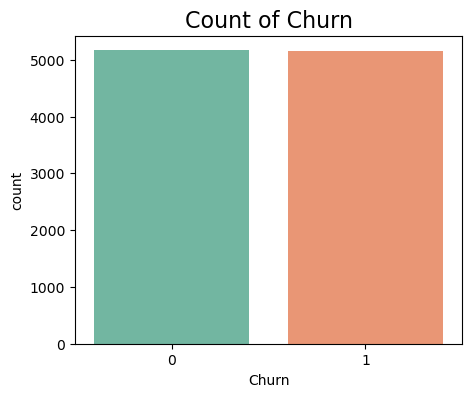

In [25]:
# Create the count plot 
plt.figure(figsize=(5, 4))
sns.countplot(x='Churn', data=df_resampled, hue='Churn', palette='Set2', legend=False)
plt.title('Count of Churn', fontsize=16)
plt.show()

## Split the dataset

In [26]:
# Separate features (X) and target variable (y)
X = df_resampled.drop(columns=['Churn'])
y = df_resampled['Churn']

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

## Naive Bayes

Accuracy of Naive Bayes Model: 0.7829
ROC-AUC of the Naive Bayes Model: 0.8521
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.73      0.77      1043
           1       0.75      0.83      0.79      1021

    accuracy                           0.78      2064
   macro avg       0.79      0.78      0.78      2064
weighted avg       0.79      0.78      0.78      2064



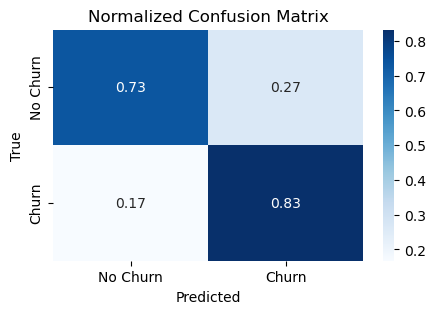

In [114]:
# Instantiate the Naive Bayes model
nb_model = GaussianNB()

# Fit the model to the training data
nb_model.fit(X_train, y_train)

# Predict on the test data
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, nb_model.predict_proba(X_test)[:, 1])

# Calculate and normalize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Print evaluation metrics
print(f"Accuracy of Naive Bayes Model: {accuracy:.4f}")
print(f"ROC-AUC of the Naive Bayes Model: {roc_auc:.4f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the normalized confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2f", cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Accuracy of Logistic Regression Model: 0.7868
ROC-AUC of the Logistic Regression Model: 0.8684
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.71      0.77      1043
           1       0.75      0.86      0.80      1021

    accuracy                           0.79      2064
   macro avg       0.79      0.79      0.79      2064
weighted avg       0.79      0.79      0.79      2064



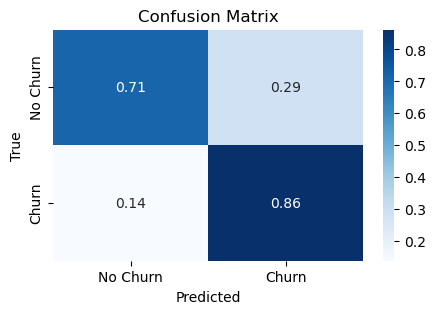

In [116]:
# Instantiate the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)  

# Fit the model to the training data
log_reg_model.fit(X_train, y_train)

# Predict on the dataset
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, log_reg_model.predict_proba(X_test)[:, 1])  
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Print evaluation metrics
print(f"Accuracy of Logistic Regression Model: {accuracy:.4f}")
print(f"ROC-AUC of the Logistic Regression Model: {roc_auc:.4f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2f", cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Accuracy of SVM Model: 0.7931
ROC-AUC of the SVM Model: 0.8682
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.73      0.78      1043
           1       0.76      0.86      0.80      1021

    accuracy                           0.79      2064
   macro avg       0.80      0.79      0.79      2064
weighted avg       0.80      0.79      0.79      2064



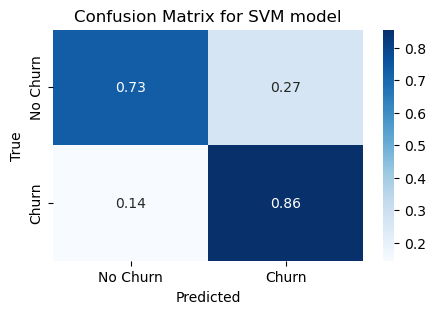

In [118]:
# Instantiate the SVM model 
svm_model = SVC(probability=True, random_state=42)  

# Fit the model to the training data
svm_model.fit(X_train, y_train)

# Predict on the dataset
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, svm_model.predict_proba(X_test)[:, 1])  
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Print evaluation metrics
print(f"Accuracy of SVM Model: {accuracy:.4f}")
print(f"ROC-AUC of the SVM Model: {roc_auc:.4f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_normalized, annot=True,  fmt=".2f", cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix for SVM model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Accuracy of Decision Tree Model: 0.7694
ROC-AUC of the Decision Tree Model: 0.7697
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.74      0.76      1043
           1       0.75      0.80      0.77      1021

    accuracy                           0.77      2064
   macro avg       0.77      0.77      0.77      2064
weighted avg       0.77      0.77      0.77      2064



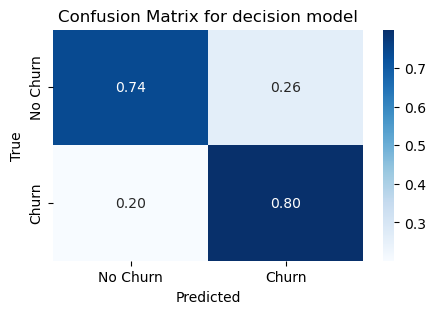

In [119]:
# Instantiate the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dt_model.fit(X_train, y_train)

# Predict on the dataset
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])  
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Print evaluation metrics
print(f"Accuracy of Decision Tree Model: {accuracy:.4f}")
print(f"ROC-AUC of the Decision Tree Model: {roc_auc:.4f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix for decision model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Accuracy of Random Forest Model: 0.8411
ROC-AUC of the Random Forest Model: 0.9172
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.80      0.84      1043
           1       0.81      0.88      0.85      1021

    accuracy                           0.84      2064
   macro avg       0.84      0.84      0.84      2064
weighted avg       0.84      0.84      0.84      2064



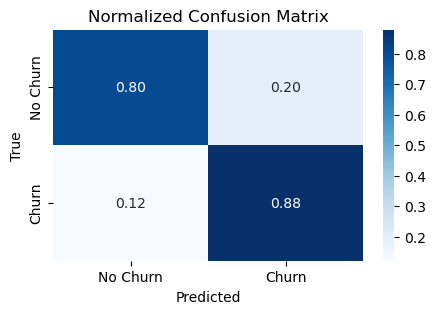

In [120]:
# Instantiate the Random Forest model with default parameters
rf_model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predict on the dataset
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

# Calculate and normalize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Print evaluation metrics
print(f"Accuracy of Random Forest Model: {accuracy:.4f}")
print(f"ROC-AUC of the Random Forest Model: {roc_auc:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the normalized confusion matrix 
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

C:\Users\venka\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy of AdaBoost Model: 0.7946
ROC-AUC of the AdaBoost Model: 0.8753
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.74      0.78      1043
           1       0.76      0.85      0.80      1021

    accuracy                           0.79      2064
   macro avg       0.80      0.80      0.79      2064
weighted avg       0.80      0.79      0.79      2064



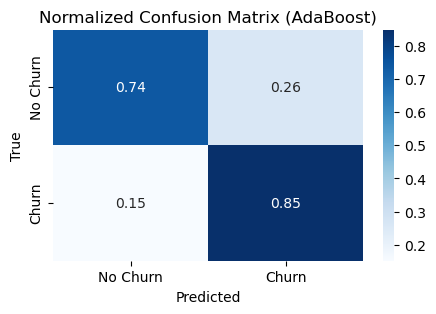

In [121]:
# Instantiate the AdaBoost model with default parameters
ada_model = AdaBoostClassifier(random_state=42)

# Fit the model to the training data
ada_model.fit(X_train, y_train)

# Predict on the dataset
y_pred = ada_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, ada_model.predict_proba(X_test)[:, 1])

# Calculate and normalize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Print evaluation metrics
print(f"Accuracy of AdaBoost Model: {accuracy:.4f}")
print(f"ROC-AUC of the AdaBoost Model: {roc_auc:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the normalized confusion matrix 
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Normalized Confusion Matrix (AdaBoost)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Accuracy of Gradient Boosting Model: 0.8052
ROC-AUC of the Gradient Boosting Model: 0.8896
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.76      0.80      1043
           1       0.77      0.86      0.81      1021

    accuracy                           0.81      2064
   macro avg       0.81      0.81      0.80      2064
weighted avg       0.81      0.81      0.80      2064



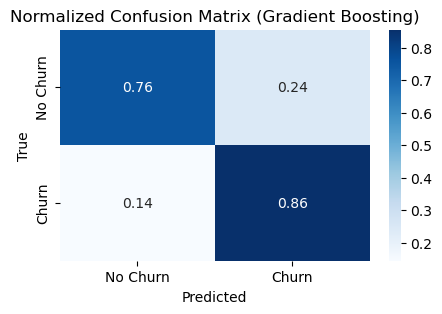

In [122]:
# Instantiate the Gradient Boosting model with default parameters
gb_model = GradientBoostingClassifier(random_state=42)

# Fit the model to the training data
gb_model.fit(X_train, y_train)

# Predict on the dataset
y_pred = gb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, gb_model.predict_proba(X_test)[:, 1])

# Calculate and normalize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Print evaluation metrics
print(f"Accuracy of Gradient Boosting Model: {accuracy:.4f}")
print(f"ROC-AUC of the Gradient Boosting Model: {roc_auc:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the normalized confusion matrix 
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Normalized Confusion Matrix (Gradient Boosting)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Accuracy of XGBoost Model: 0.8324
ROC-AUC of the XGBoost Model: 0.9102
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1043
           1       0.81      0.87      0.84      1021

    accuracy                           0.83      2064
   macro avg       0.83      0.83      0.83      2064
weighted avg       0.83      0.83      0.83      2064



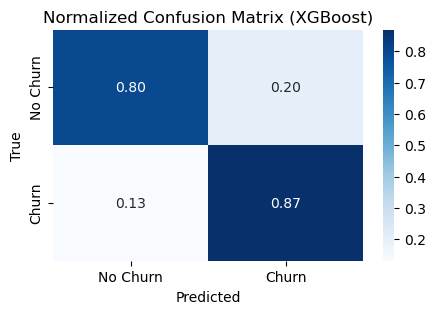

In [123]:
# Instantiate the XGBoost model with default parameters
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Predict on the dataset
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

# Calculate and normalize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Print evaluation metrics
print(f"Accuracy of XGBoost Model: {accuracy:.4f}")
print(f"ROC-AUC of the XGBoost Model: {roc_auc:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the normalized confusion matrix with decimal points
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Normalized Confusion Matrix (XGBoost)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [124]:
from sklearn.ensemble import StackingClassifier

# Define base learners and meta-learner
base_learners = [
    ('svm', SVC(probability=True, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
]

# Meta-learner
meta_learner = LogisticRegression(random_state=42)

# Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)

# Fit the stacking model
stacking_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = stacking_clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix in decimal form
cm = confusion_matrix(y_test, y_pred)
cm_decimal = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  

print("Confusion Matrix:")
print(np.round(cm_decimal, 2))  

Accuracy: 0.8008720930232558
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.75      0.79      1043
           1       0.77      0.85      0.81      1021

    accuracy                           0.80      2064
   macro avg       0.80      0.80      0.80      2064
weighted avg       0.80      0.80      0.80      2064

Confusion Matrix:
[[0.75 0.25]
 [0.15 0.85]]


Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
Best Hyperparameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 0.9}
Accuracy of Tuned XGBoost Model: 0.8324
ROC-AUC of Tuned XGBoost Model: 0.9125
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1043
           1       0.81      0.86      0.83      1021

    accuracy                           0.83      2064
   macro avg       0.83      0.83      0.83      2064
weighted avg       0.83      0.83      0.83      2064



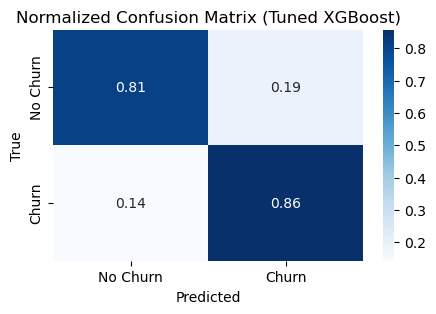

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define a smaller hyperparameter grid
param_grid = {
    'n_estimators': [100, 150, 200],               # Number of trees (less range to start)
    'max_depth': [3, 5, 7],                       # Maximum depth of a tree (reduced range)
    'learning_rate': [0.01, 0.1, 0.3],              # Learning rate
    'subsample': [0.8,0.9, 1.0],                   # Fraction of samples for training each tree
    'colsample_bytree': [0.8, 1.0],            # Fraction of features per tree
    'gamma': [0, 0.1],                         # Regularization term (use small values)
    'reg_alpha': [0, 0.1],                     # L1 regularization term
    'reg_lambda': [0, 0.1]                     # L2 regularization term
}

# Instantiate the XGBoost model with default parameters
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='roc_auc')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Use the best model
best_xgb_model = grid_search.best_estimator_

# Predict on the test data
y_pred = best_xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_xgb_model.predict_proba(X_test)[:, 1])

# Calculate and normalize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Print evaluation metrics
print(f"Accuracy of Tuned XGBoost Model: {accuracy:.4f}")
print(f"ROC-AUC of Tuned XGBoost Model: {roc_auc:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the normalized confusion matrix with decimal points
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Normalized Confusion Matrix (Tuned XGBoost)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Instantiate the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           scoring='roc_auc', cv=5, verbose=2, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

# Predict with the best model
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluate the tuned model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

print(f"Tuned Model Accuracy: {accuracy:.4f}")
print(f"Tuned Model ROC-AUC: {roc_auc:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the normalized confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
